# [E-02] load_digits

**손글씨 이미지를 분류하는 과제**

## 0. 모듈 불러오기

In [316]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import pandas as pd

## 1. 데이터 준비

In [317]:
digits = load_digits(as_frame=True)

## 2. 데이터 확인

1. digits가 가지고 있는 데이터를 확인

In [318]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


2. 각 데이터가 어떤 것을 의미하는지 확인    
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html    

참고 페이지를 살펴보면 digits 데이터 셋의 경우 8x8의 이미지를 가지고 있다고 한다.

In [319]:
# digits.images : 이미지 배열을 가지고 있다.
digits.images[0].shape # result: (8,8)로 8x8 이미지라는 것을 알 수 있다.

(8, 8)

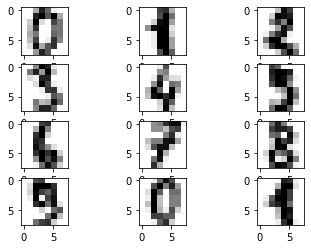

In [320]:
fig, axes = plt.subplots(4,3)
for ax, image in zip(axes.flat, digits.images): 
    ax.imshow(image, cmap=plt.cm.binary)
plt.show()

위의 페이지를 참고해 이번 과제에서 내가 필요한 데이터를 생각해본다면 
* data : 데이터 행렬을 벡터로 가지고 있는 데이터
* target : 분류된 라벨데이터.
* feature_names : data안 각 항목이 의미하는 이름
* target_names : 라벨의 종류

* digits.data와 digits.images의 다른 점    
8x8 형태의 이미지를 한 row로 만든 것이 digits.data이다.

In [321]:
digits.data.shape, digits.images.shape

((1797, 64), (1797, 8, 8))

In [322]:
# 데이터 Describe
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

위 Describe에서 파악할 수 있는 사실은    
* 특성의 개수는 64개
* 특성의 의미는 8x8 이미지의 픽셀 값. 정수형 픽셀로 데이터의 범위는 0~16
* 누락된 특성 값은 없다. (NaN 값이 없다)

In [323]:
print(f'특성의 개수: {len(digits.feature_names)}')
print(f'특성: {digits.feature_names}')

특성의 개수: 64
특성: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [324]:
# 데이터의 shape
digits_data = digits.data
digits_label = digits.target

print('데이터 shape')
print(digits_data.shape)
print('라벨 shape')
print(digits_label.shape)

데이터 shape
(1797, 64)
라벨 shape
(1797,)


In [325]:
# digits의 이미지 데이터
digits_data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [326]:
# digits의 라벨 데이터
print(digits_label)

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64


## 3. 데이터 분리

In [327]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=23)
X_train.shape, X_test.shape

((1437, 64), (360, 64))

## 4. 다양한 모델로 학습

In [328]:
# 다양한 모델들의 정확도를 한꺼번에 계산하기 위해 예측값들을 저장하는 변수 추가
y_pred_list = []

### 4.1 Decision Tree

In [329]:
from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier(random_state=20)
decision_model.fit(X_train, y_train)
y_pred = decision_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.89      0.80      0.84        40
           2       1.00      0.87      0.93        38
           3       0.71      0.86      0.78        29
           4       0.89      0.85      0.87        40
           5       0.91      0.91      0.91        44
           6       0.90      0.90      0.90        31
           7       0.90      1.00      0.95        28
           8       0.71      0.76      0.73        38
           9       0.84      0.76      0.80        42

    accuracy                           0.86       360
   macro avg       0.86      0.87      0.86       360
weighted avg       0.87      0.86      0.86       360



### 4.2  RandomForestClassifier

In [330]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=20)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.95      0.97      0.96        40
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        29
           4       0.97      0.97      0.97        40
           5       0.96      0.98      0.97        44
           6       1.00      0.97      0.98        31
           7       0.97      1.00      0.98        28
           8       0.97      0.95      0.96        38
           9       1.00      0.98      0.99        42

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### 4.3 SVM

In [331]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.98      1.00      0.99        40
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        29
           4       1.00      0.97      0.99        40
           5       1.00      1.00      1.00        44
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        28
           8       0.95      0.97      0.96        38
           9       1.00      0.98      0.99        42

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### 4.4 SGD 

In [332]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.86      0.80      0.83        40
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        29
           4       1.00      0.93      0.96        40
           5       0.98      0.98      0.98        44
           6       0.94      1.00      0.97        31
           7       0.93      0.96      0.95        28
           8       0.76      0.92      0.83        38
           9       1.00      0.88      0.94        42

    accuracy                           0.94       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.94      0.94       360



### 4.5 Logistic Regression

In [333]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.93      0.95      0.94        40
           2       1.00      1.00      1.00        38
           3       0.94      1.00      0.97        29
           4       0.97      0.95      0.96        40
           5       0.93      0.93      0.93        44
           6       0.97      1.00      0.98        31
           7       0.90      0.96      0.93        28
           8       0.94      0.87      0.90        38
           9       1.00      0.95      0.98        42

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [334]:
from sklearn.metrics import accuracy_score
# 0: decision tree, 1: random forest, 2: svm, 3: sgd classifier, 4: logistic regression
for idx, y_pred in enumerate(y_pred_list):
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{idx} : {accuracy}')

0 : 0.8611111111111112
1 : 0.9805555555555555
2 : 0.9916666666666667
3 : 0.9416666666666667
4 : 0.9583333333333334


위 결과로 SVM가 정확도가 높은 것을 알 수 있다.    
SVM의 성능을 조금 더 향상시키기 위해 데이터를 표준화시켜보기로 했다.

### 4.6 표준화

In [335]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

#### 4.6.1 표준화 시킨 데이터를 가지고 모델 재 훈련

In [336]:
svm_model_scaler = svm.SVC()
svm_model_scaler.fit(X_train_scaler, y_train)
y_pred_scaler = svm_model_scaler.predict(X_test_scaler)
print(classification_report(y_test, y_pred_scaler))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      0.97      0.97        40
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        29
           4       0.98      1.00      0.99        40
           5       1.00      1.00      1.00        44
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        28
           8       0.97      0.97      0.97        38
           9       1.00      0.98      0.99        42

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [337]:
# 표준화 전과 후 성능 비교
accuracy_before = accuracy_score(y_test, y_pred_list[2])
accuracy_after = accuracy_score(y_test, y_pred_scaler)
print(f'before: {accuracy_before}, after:{accuracy_after}')

before: 0.9916666666666667, after:0.9916666666666667


#### 4.6.2 표준화 결과
SVM의 경우 데이터가 가우시안 분포를 가진다는 가정하에 구현되어 성능향상을 위해 표준화 작업을 하고 모델을 평가했을 때    
그 전과 비교해 차이가 없다는 것을 볼 수 있다.    
digit에서는 특성의 값 범위가 0~16으로 정해져 있기에 표준화가 성능향상을 가져오지 않는 것으로 보인다.

## 5. 모델 평가하기

digit 데이터셋에서는 평가 지표 중 accuracy를 사용하기로 했다.    

### 결과

SVM의 accuracy는 0.99이다.

### 평가지표로 accuracy를 사용한 이유

각 클래스 별 라벨 데이터의 개수를 살펴보면 다음과 같다.

In [338]:
test = pd.DataFrame(digits.data, columns=digits.feature_names)
test['label'] = digits.target

In [339]:
test.label.value_counts().sort_values(ascending=False)

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: label, dtype: int64

1. 위 결과로 target의 클래스별 데이터 개수는 균등하게 분포하는 것을 알 수 있다.     
2. digit의 경우 정답 또는 오류를 틀리게 예측한 것을 파악하는 것보다 (정답, 오류를)바르게 예측하는게 더 중요하기 때문이다.

# [E-02] load_wine

**와인의 종류를 분류하는 과제**

## 0. 모듈 불러오기

In [510]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 1. 데이터 준비

In [511]:
wines = load_wine(as_frame=True)

## 2. 데이터 확인

1. wines가 가지고 있는 데이터를 확인

In [512]:
print(wines.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


2. 각 데이터가 어떤 것을 의미하는지 확인    
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [513]:
# data의 모양 13개의 특성, 178개의 데이터가 있다.
print(wines.data.shape)

(178, 13)


In [514]:
# target의 모양 178개의 데이터가 있다.
print(wines.target.shape)

(178,)


In [515]:
# 클래스는 3가지를 가지고 있다.
print(wines.target_names)

['class_0' 'class_1' 'class_2']


In [516]:
# 13개의 특성을 가진다는 것을 알 수 있다.
print(wines.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [517]:
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

위 Describe에서 파악할 수 있는 사실은    
* 특성의 개수는 13개이고 모두 정수형 데이터이다.
* 누락된 특성 값은 없다. (NaN 값이 없다)
* `class_0 (59), class_1 (71), class_2 (48)` : 클래스 별 데이터 개수에 약간의 불균형이 존재한다.

In [518]:
wines_df = wines.frame.copy()
wines_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 3. 특징 골라내기

In [519]:
wines_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


클래스 별 각 특징들의 분포가 어떻게 파악되는지 확인하기 위해 swarmplot을 사용해서 시각화 했다.

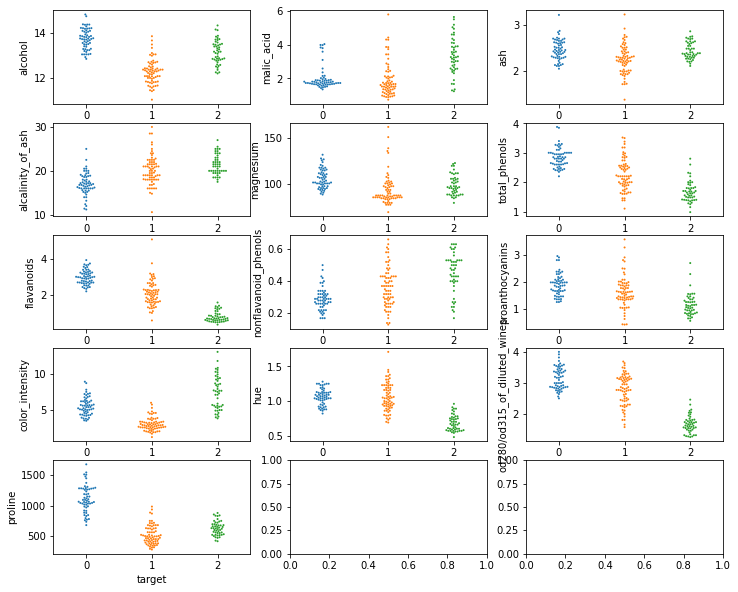

In [520]:
fig, axes = plt.subplots(5,3, figsize=(12,10))
for ax, feature in zip(axes.flat, wines_df.columns[:-1]): 
    sns.swarmplot(data=wines_df, x='target',y=feature, ax=ax, size=2)
plt.show()

이 그래프를 분석해본 결과 넓게 펴져있지 않고 클래스끼리 겹치지 않는 범위에서 고르게 퍼져 있는 것은 alcohol, flavanoids, color_intensity, proline, magnesium, od280/od315_of_diluted_wines을 뽑을 수 있었다.

In [521]:
select_features=['alcohol', 'flavanoids', 'color_intensity', 'proline', 'magnesium', 'od280/od315_of_diluted_wines']

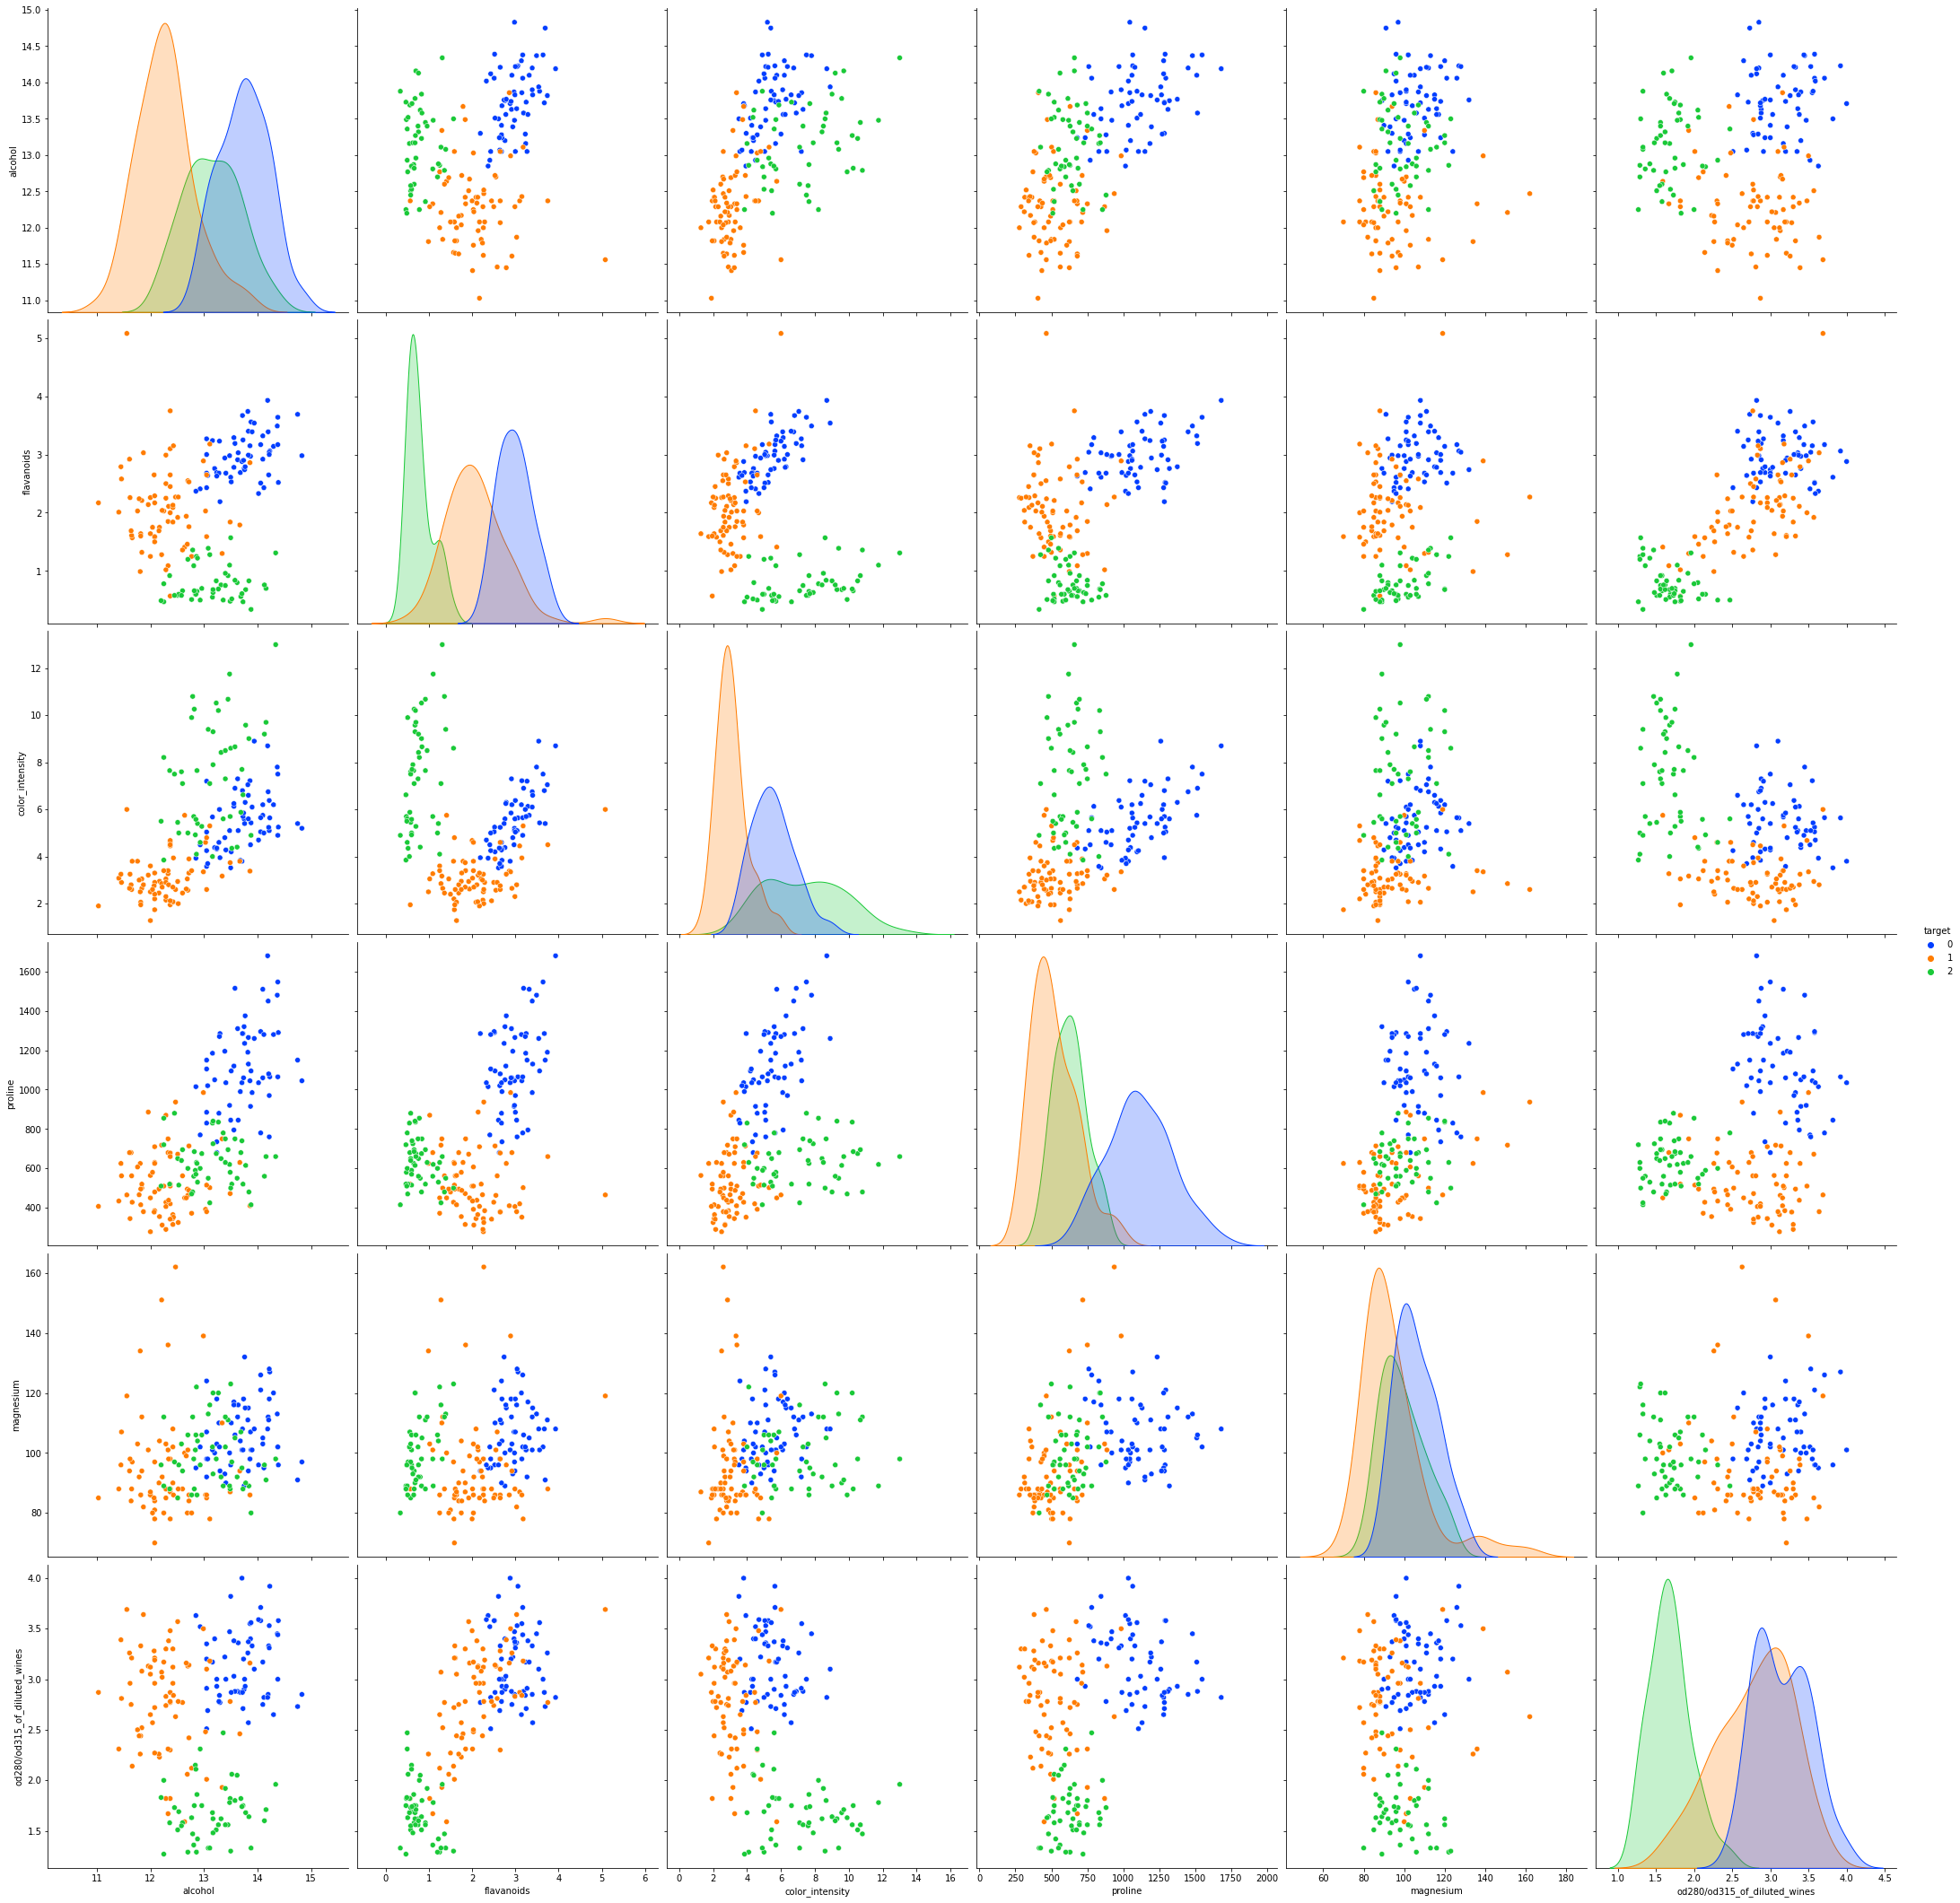

In [522]:
sns.pairplot(data=wines_df, x_vars=select_features, y_vars=select_features,hue='target', height=5,  palette="bright")

## 3. 훈련 및 테스트 데이터 분리

In [523]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wines.data[select_features], wines.target, test_size=0.2, random_state=23)
X_train.shape, X_test.shape

((142, 6), (36, 6))

In [524]:
X_train.head()

,alcohol,flavanoids,color_intensity,proline,magnesium,od280/od315_of_diluted_wines
102,12.34,2.11,2.80,438.0,98.0,3.38
75,11.66,1.57,3.80,428.0,97.0,2.14
3,14.37,3.49,7.80,1480.0,113.0,3.45
69,12.21,1.28,2.85,718.0,151.0,3.07
99,12.29,2.99,2.30,406.0,88.0,2.83


## 4. 다양한 모델로 학습

In [525]:
# 다양한 모델들의 정확도를 한꺼번에 계산하기 위해 예측값들을 저장하는 변수 추가
y_pred_list = []

### 4.1 Decision Tree

In [526]:
from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier(random_state=20)
decision_model.fit(X_train, y_train)
y_pred = decision_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 4.2  RandomForestClassifier

In [527]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=20)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 4.3 SVM

In [528]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.74      0.93      0.82        15
           2       0.83      0.50      0.62        10

    accuracy                           0.83        36
   macro avg       0.86      0.81      0.82        36
weighted avg       0.84      0.83      0.82        36



### 4.4 SGD 

In [529]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.54      1.00      0.70        15
           2       0.00      0.00      0.00        10

    accuracy                           0.64        36
   macro avg       0.51      0.58      0.51        36
weighted avg       0.53      0.64      0.55        36



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4.5 Logistic Regression

In [530]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 5. 모델 평가하기

wine 데이터셋에서는 평가 지표 중 f1 score를 사용하기로 했다.    

In [540]:
from sklearn.metrics import f1_score
# 0: decision tree, 1: random forest, 2: svm, 3: sgd classifier, 4: logistic regression
for idx, y_pred in enumerate(y_pred_list):
    accuracy = f1_score(y_test, y_pred, average='weighted')
    print(f'{idx} : {accuracy}')

0 : 1.0
1 : 1.0
2 : 0.8223039215686274
3 : 0.5480076159390725
4 : 1.0


### 결과

DecisionTree, RandomForestClassifier, Logistic Regression의 f1-score는  1.0이다.

### 평가지표로 f1-score를 사용한 이유

각 클래스 별 라벨 데이터의 개수를 살펴보면 다음과 같다.

In [412]:
wines_df.target.value_counts().sort_values(ascending=False)

1    71
0    59
2    48
Name: target, dtype: int64

1. 위 결과로 target의 클래스별 데이터 개수는 균등하지 않게 분포하는 것을 알 수 있다.     
2. f1 score는 큰 값에 패널티를 주면서 작은 값 위주로 평균을 구하기 때문에 불균형한 데이터에서 잘 작동을 한다.   
3. f1 score average로 weighted를 사용한 이유 : weighted 옵션은 라벨 불균형을 고려해 점수를 계산하기 때문에 선택했다.

# [E-02] load_breast_cancer

**유방암 여부를 판단하는 과제**

## 0. 모듈 불러오기

In [541]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 1. 데이터 준비

In [542]:
breast_cancer = load_breast_cancer(as_frame=True)

## 2. 데이터 확인

1. breast_cancer가 가지고 있는 데이터를 확인

In [543]:
print(breast_cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


2. 각 데이터가 어떤 것을 의미하는지 확인    
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [544]:
# data의 모양 30개의 특성, 569개의 데이터가 있다.
print(breast_cancer.data.shape)

(569, 30)


In [545]:
# target의 모양 569개의 데이터가 있다.
print(breast_cancer.target.shape)

(569,)


In [546]:
# 클래스는 2가지를 가지고 있다.
print(breast_cancer.target_names)
# mlignant(0) : 악성
# benign(1) : 양성

['malignant' 'benign']


In [547]:
# 30개의 특성을 가진다는 것을 알 수 있다.
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [548]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [549]:
breast_cancer_df = breast_cancer.frame.copy()
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

위 Describe에서 파악할 수 있는 사실은    
* 특성의 개수는 30개이고 모두 정수형 데이터이다.
* 누락된 특성 값은 없다. (NaN 값이 없다)
* `Malignant(212), Benign(357)` : 클래스 별 데이터 개수에 약간의 불균형이 존재한다.

In [550]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension으로 기본적인 컬럼이 있고 이 데이터의 mean, error, worst가 따로 있어 mean과 error와 worst가 어떤 관계에 있는지 확인하려 한다.

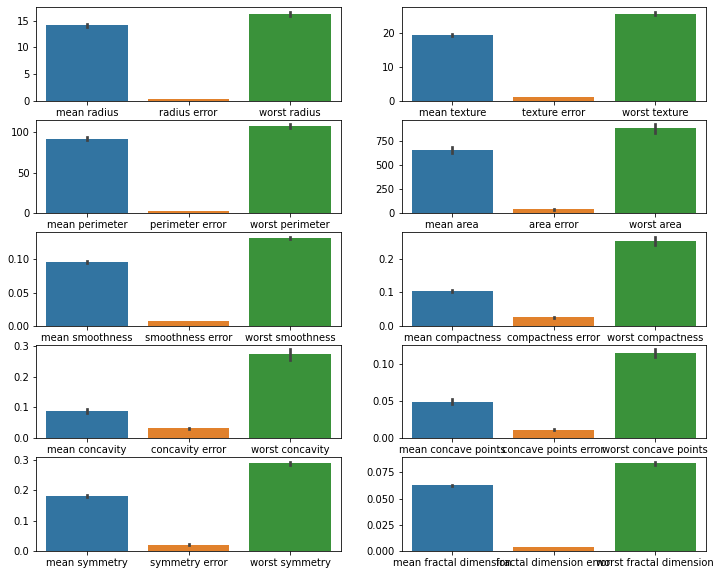

In [551]:
common_feature = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']
fig, axs = plt.subplots(5, 2, figsize=(12,10))
for ax, common in zip(axs.flat, common_feature):
    sns.barplot(data=breast_cancer_df[[f'mean {common}', f'{common} error', f'worst {common}']], ax=ax)

위의 결과로 worst > mean > symmetry 순으로 값의 크기에 차이가 있다는 것을 알 수 있다.

## 3. 특징 골라내기

In [552]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


클래스 별 각 특징들의 분포가 어떻게 파악되는지 확인하기 위해 swarmplot을 사용해서 시각화 했다.

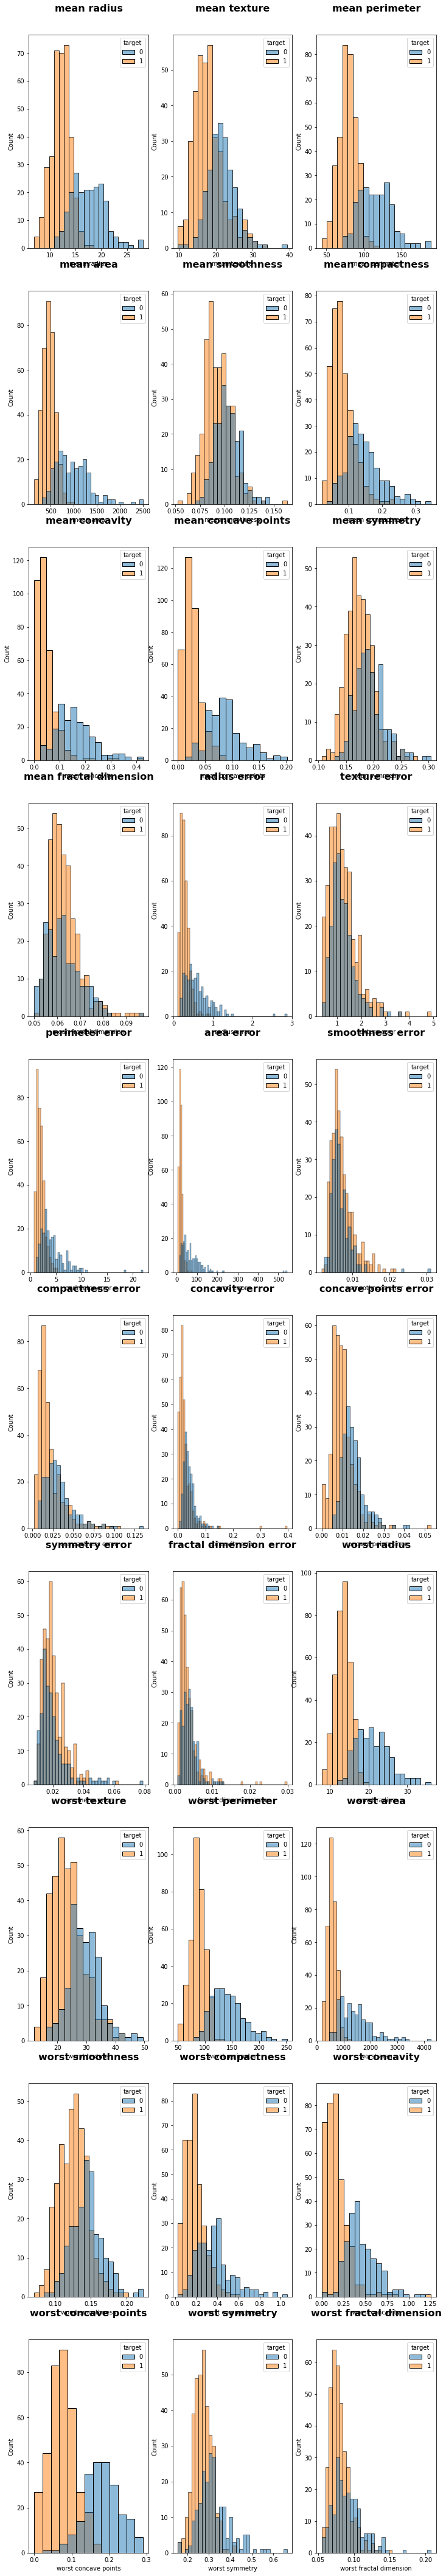

In [553]:
fig, axes = plt.subplots(10,3, figsize=(12,20))
for ax, feature in zip(axes.flat, breast_cancer_df.columns[:-1]): 
    sns.histplot(data=breast_cancer_df, x=feature, hue='target', ax=ax)
    ax.text(x=0.5, y=1.1, s=feature, fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
plt.subplots_adjust(top=3)
plt.show()

이 그래프를 분석해본 결과, 클래스간 최대한 범위가 겹치지 않은 feature는    
mean radius, mean perimeter, mean area, mean concavity, mean concave points, radius error, perimeter error, area error, worst radius, worst perimeter, worst area,  worst concavity, worst concave points이다.

여기서 공통된 이름끼리 묶으면 
* mean radius, radius error, worst radius
* mean perimeter, perimeter error, worst perimeter
* mean area, area error, worst area

이들 간 상관관계를 알기 위해 scatter을 찍어보도록 하자.

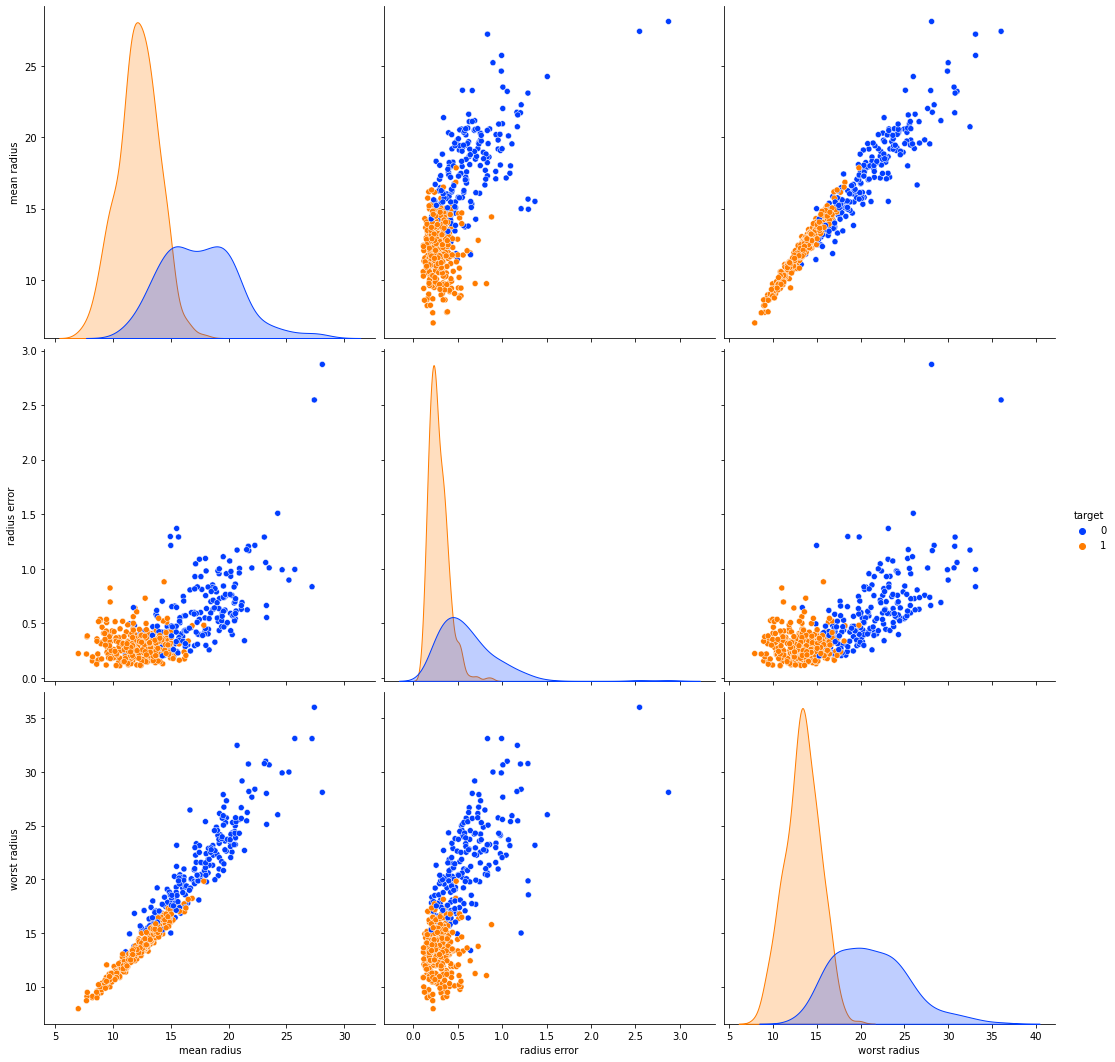

In [554]:
sns.pairplot(data=breast_cancer_df, x_vars=['mean radius', 'radius error', 'worst radius'], y_vars=['mean radius', 'radius error', 'worst radius'],hue='target', height=5,  palette="bright")

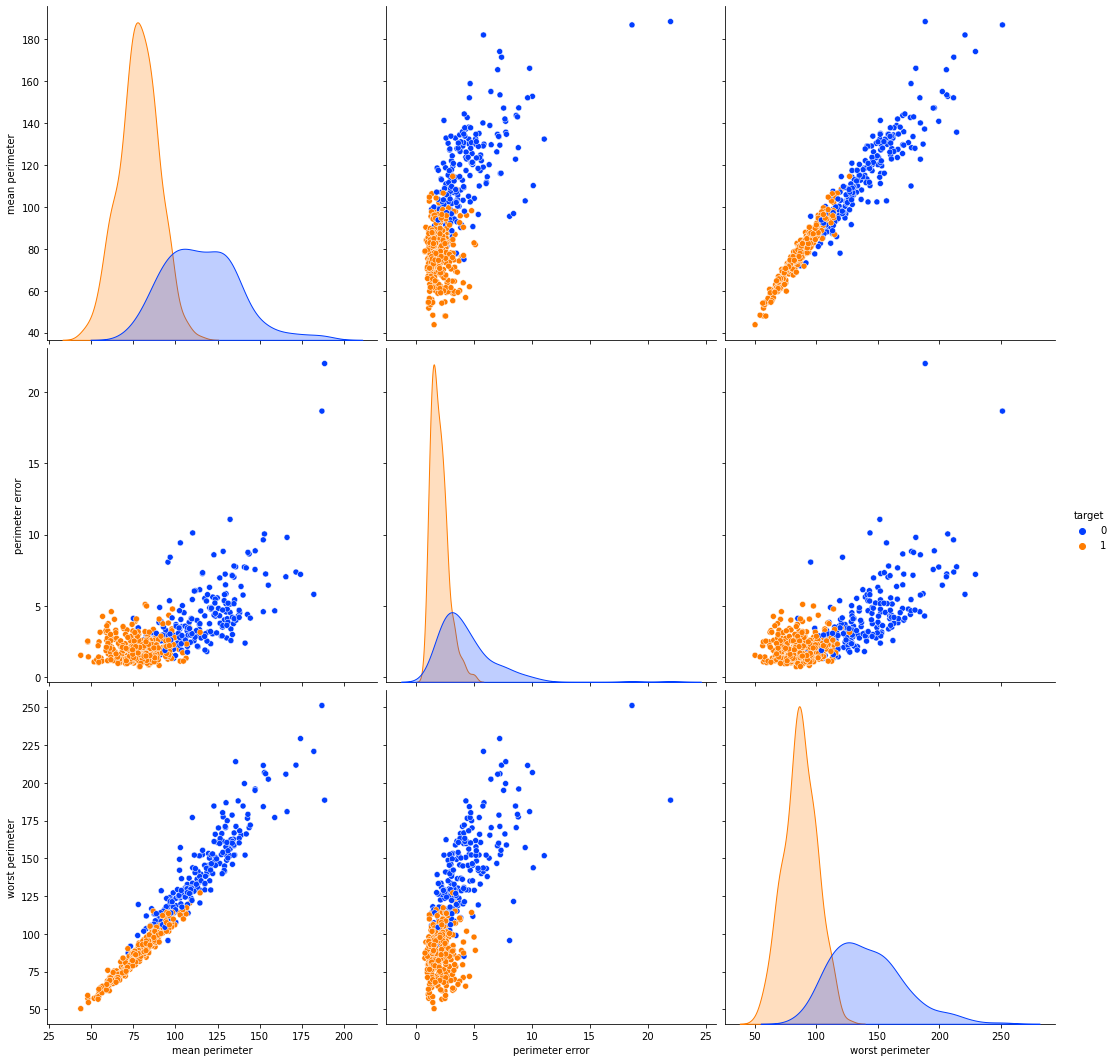

In [555]:
sns.pairplot(data=breast_cancer_df, x_vars=['mean perimeter', 'perimeter error', 'worst perimeter'], y_vars=['mean perimeter', 'perimeter error', 'worst perimeter'],hue='target', height=5,  palette="bright")

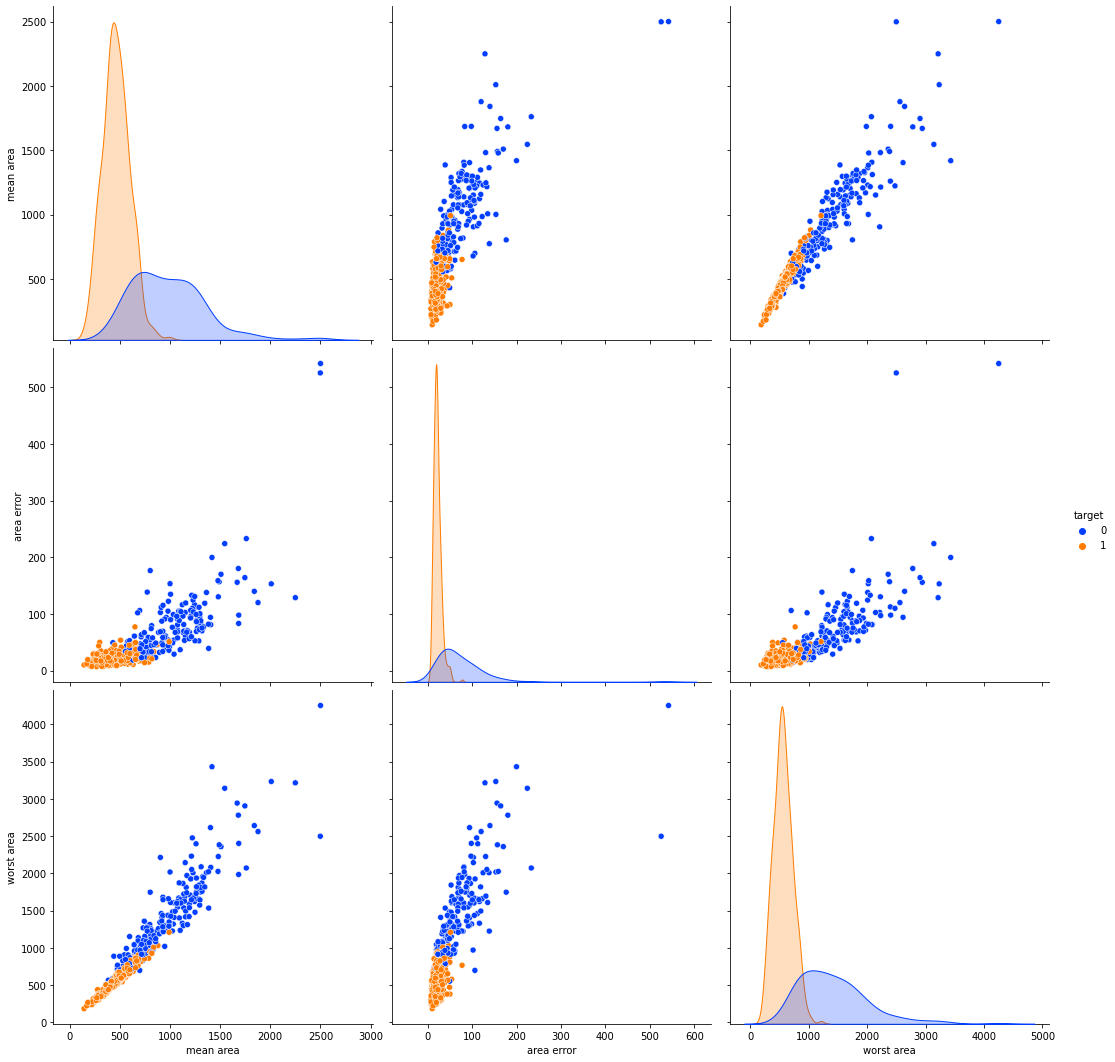

In [556]:
sns.pairplot(data=breast_cancer_df, x_vars=['mean area', 'area error', 'worst area'], y_vars=['mean area', 'area error', 'worst area'],hue='target', height=5,  palette="bright")

시각화 결과 mean, error, worst는 비슷한 관계에 있다는 것을 알 수 있었다.
그렇다면 radius, perimeter, area의 관계는 어떨까? 대표적으로 mean에서만 시각화해보자.

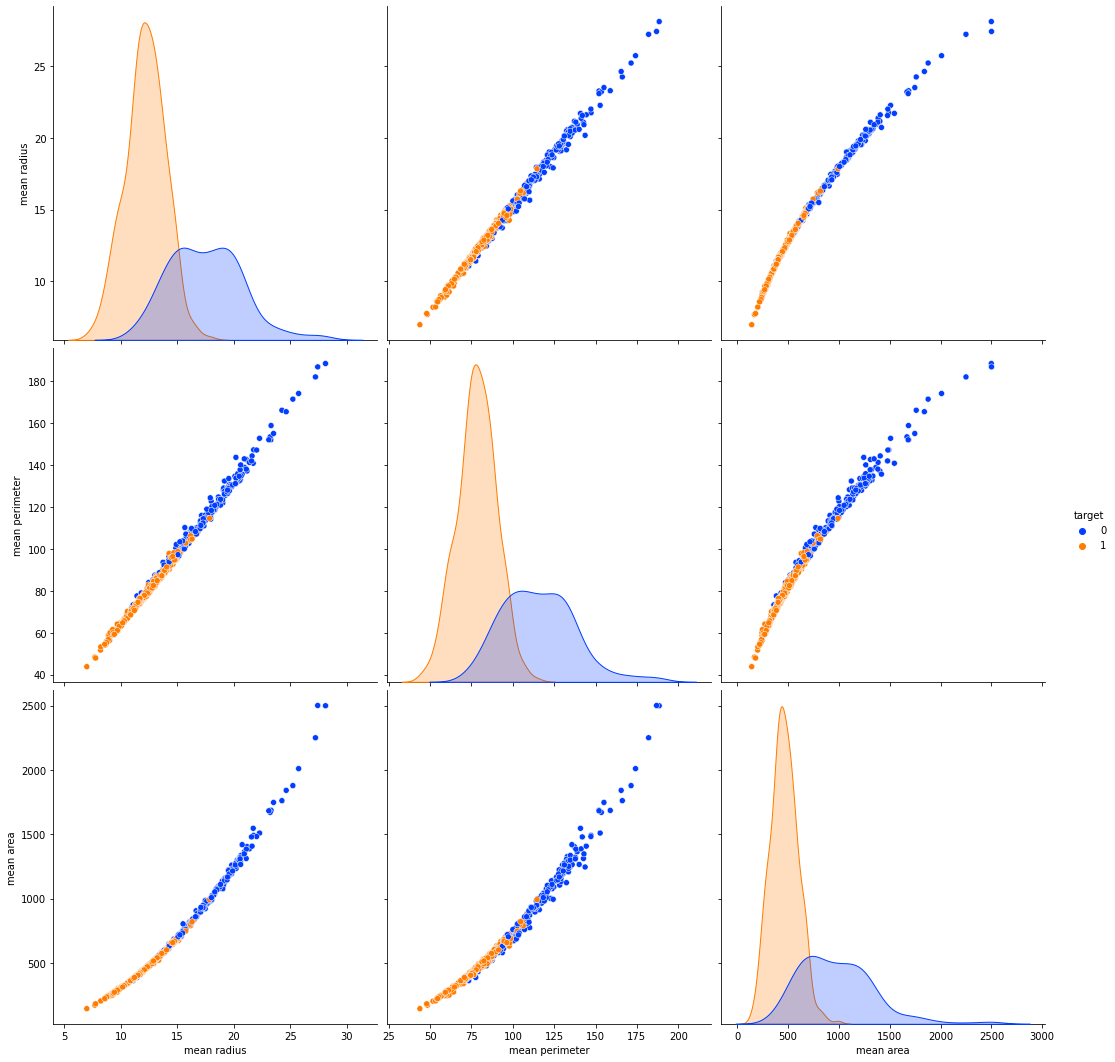

In [557]:
sns.pairplot(data=breast_cancer_df, x_vars=['mean radius', 'mean perimeter', 'mean area'], y_vars=['mean radius', 'mean perimeter', 'mean area'],hue='target', height=5,  palette="bright")

처음 뽑힌 feature에 대해서 전체적으로 시각화하고자 한다.    
mean, error, area가 비슷한 관계에 있다는 사실을 이용해 feature를 더 뽑아내게 되면    
mean radius, mean perimeter, mean area, mean concavity, mean concave points이다.

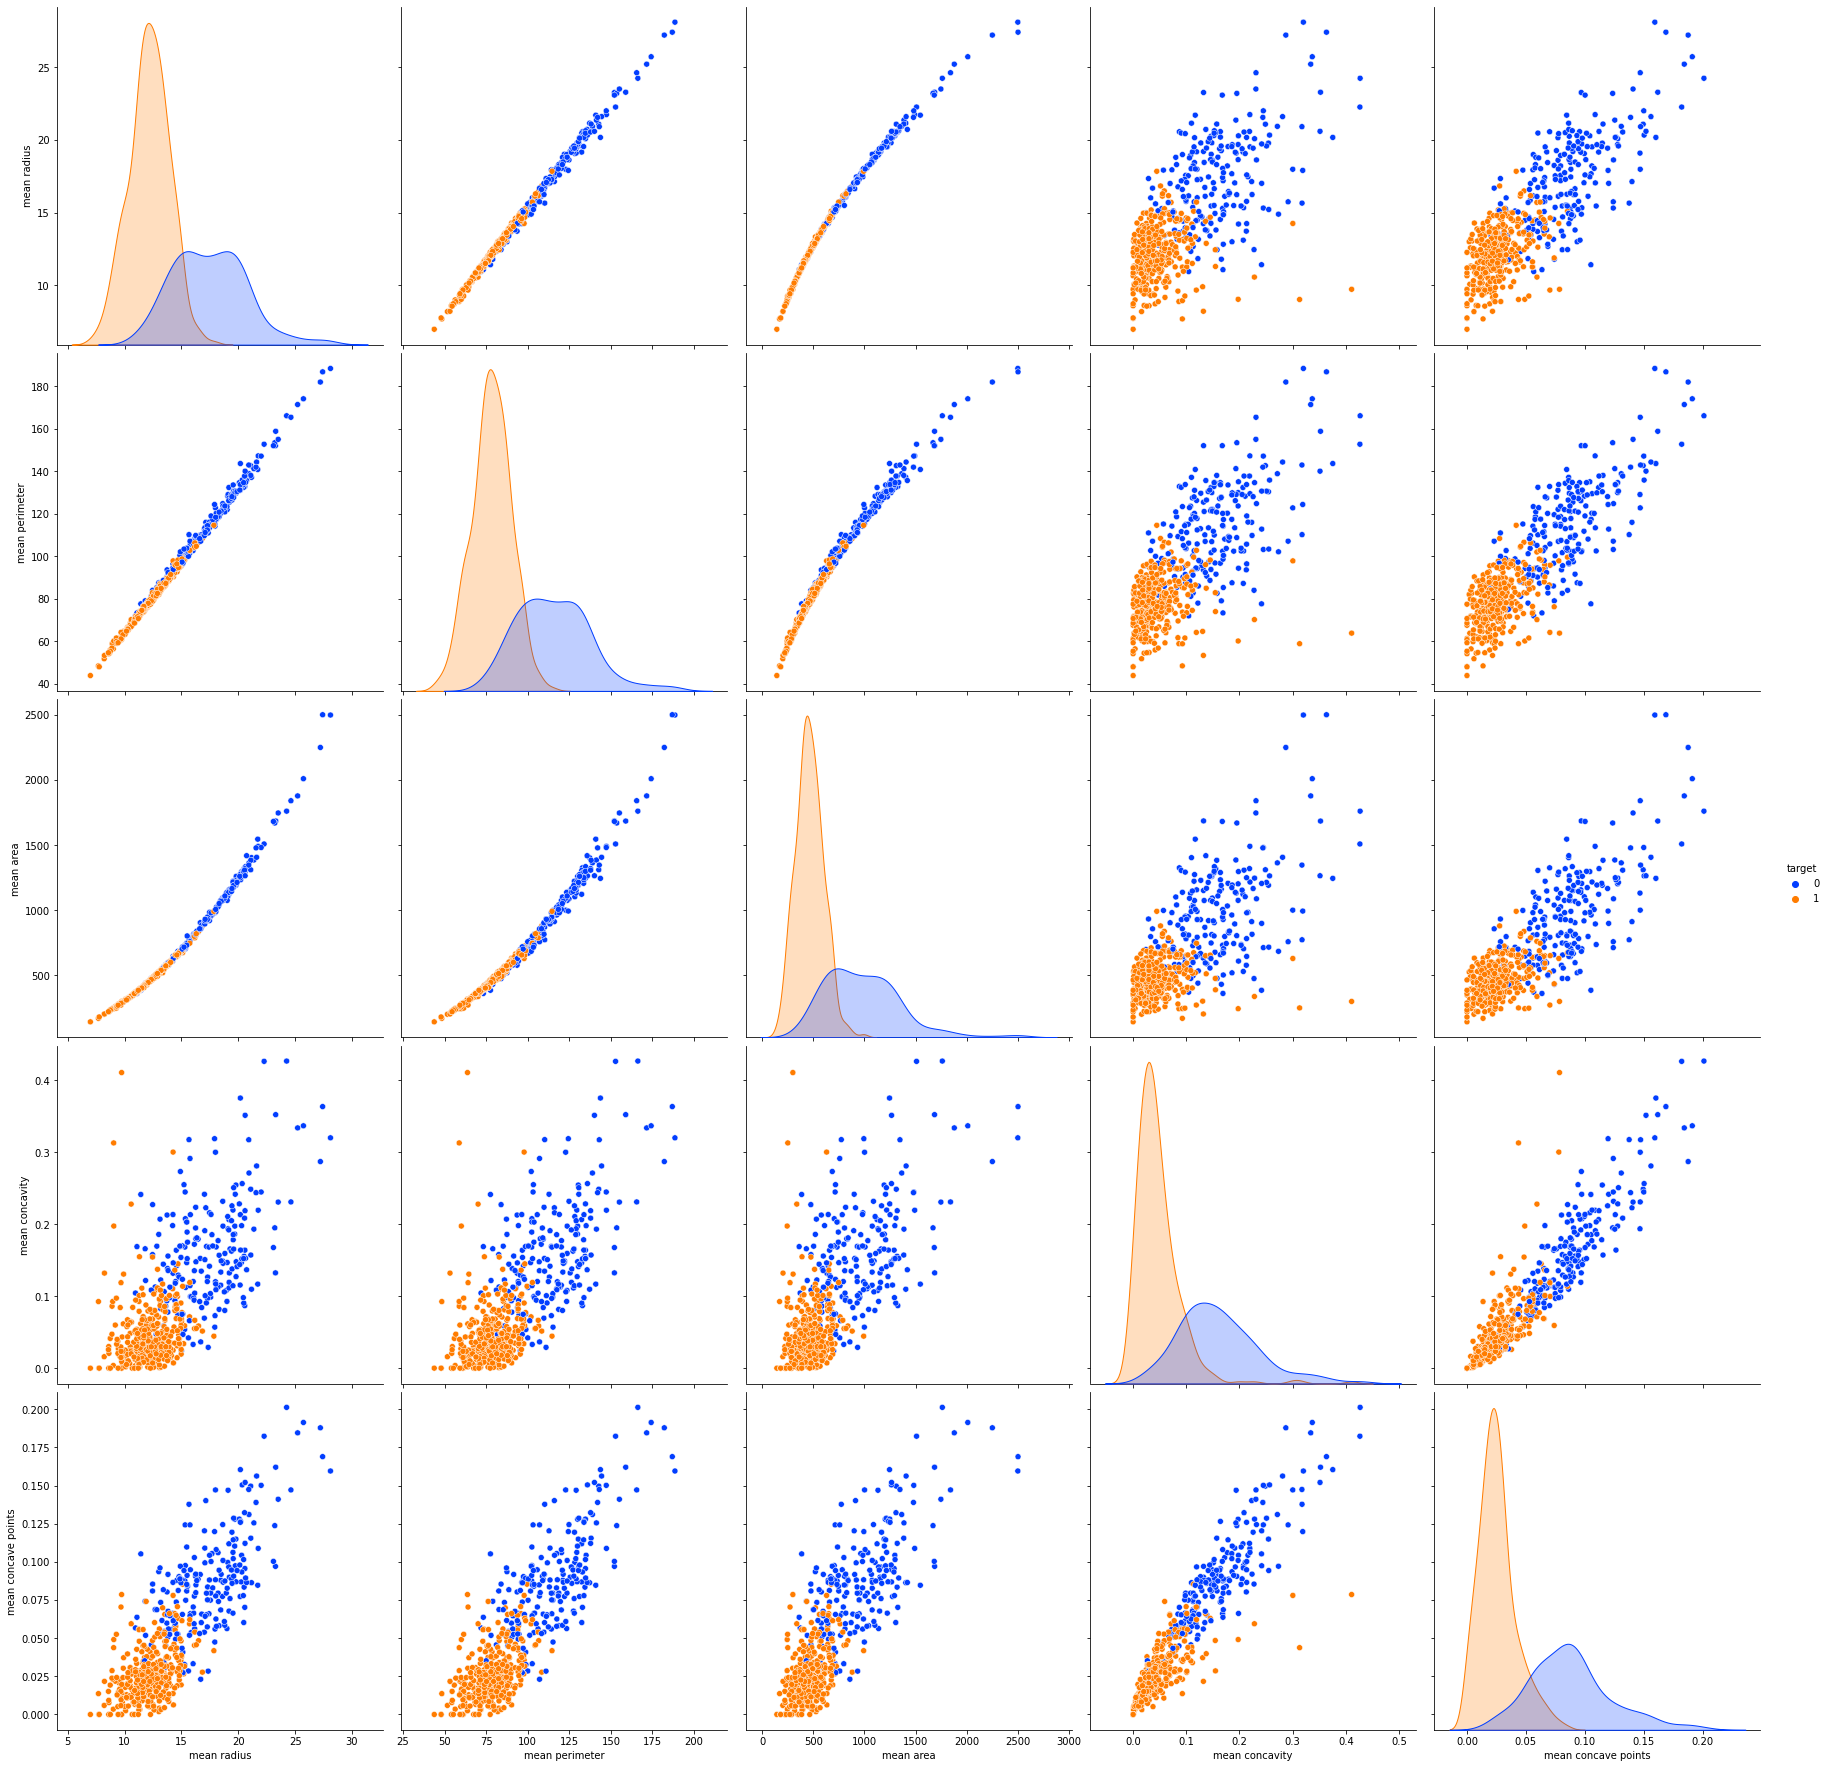

In [558]:
sns.pairplot(data=breast_cancer_df, x_vars=['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points'], y_vars=['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points'],hue='target', height=5,  palette="bright")

In [559]:
select_features=['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points']

## 3. 훈련 및 테스트 데이터 분리

In [560]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data[select_features], breast_cancer_df.target, test_size=0.2, random_state=23)
X_train.shape, X_test.shape

((455, 5), (114, 5))

In [561]:
X_train.head()

,mean radius,mean perimeter,mean area,mean concavity,mean concave points
115,11.930,76.53,438.6,0.03328,0.02008
108,22.270,152.80,1509.0,0.42640,0.18230
470,9.667,61.49,289.1,0.02948,0.01514
476,14.200,92.41,618.4,0.05063,0.03058
270,14.290,90.30,632.6,0.00725,0.00625


## 4. 다양한 모델로 학습

In [562]:
# 다양한 모델들의 정확도를 한꺼번에 계산하기 위해 예측값들을 저장하는 변수 추가
y_pred_list = []

### 4.1 Decision Tree

In [563]:
from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier(random_state=20)
decision_model.fit(X_train, y_train)
y_pred = decision_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        39
           1       0.92      0.95      0.93        75

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



### 4.2  RandomForestClassifier

In [564]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=20)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.93      0.93      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



### 4.3 SVM

In [565]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        39
           1       0.90      0.97      0.94        75

    accuracy                           0.91       114
   macro avg       0.92      0.88      0.90       114
weighted avg       0.91      0.91      0.91       114



### 4.4 SGD 

In [566]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        39
           1       0.97      0.84      0.90        75

    accuracy                           0.88       114
   macro avg       0.86      0.89      0.87       114
weighted avg       0.90      0.88      0.88       114



### 4.5 Logistic Regression

In [567]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
y_pred_list.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.96      0.96      0.96        75

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



위 결과로 Logistic Regression이 높은 것을 볼 수 있다. 

## 5. 모델 평가하기

 유방암 데이터셋에서는 평가 지표 중 Recall을 사용하기로 했다.    

In [568]:
from sklearn.metrics import recall_score
# 0: decision tree, 1: random forest, 2: svm, 3: sgd classifier, 4: logistic regression
for idx, y_pred in enumerate(y_pred_list):
    score = recall_score(y_test, y_pred)
    print(f'{idx} : {score}')

0 : 0.9466666666666667
1 : 0.9333333333333333
2 : 0.9733333333333334
3 : 0.84
4 : 0.96


### 결과

SVM의 recall은 0.97로 제일 높다.

### 평가지표로 recall를 사용한 이유

1. 데이터의 특성 상 암인데 암이 아닌 것으로 예측하는 것보다 암이 아닌 것을 암으로 예측하는 것이 낫기 때문이다.        

# 회고


이번 노드를 하면서 정말 머신러닝 훈련에 정말 필요한 특징을 뽑아내는 작업을 했다.    
특징을 뽑아내려면 특징 간에 관계 등과 같은 다양한 정보를 얻기 위해서 시각화작업을 했다.    
시각화를 하면서 고민했던 것은 두가지가 있었다.
1. 어떤 시각화 도구를 이용할 것인가
2. 시각화된 데이터에서 나는 어떤 정보를 얻을 수 있는가    

1번은 시행착오를 계속 겪으면서 찾아나갔다. 이 과정은 현재 진행중인 '두시.데이터' 풀잎에서 진행하는 kaggle cousera가 도움이 많이 되었다.    
2번은 계속 내가 연습해나가야 하는 것이기도 하다. 시각화는 잘 했는데 어떤 정보를 얻을 것인가는 계속 고민이 되었다. classification 데이터이기 때문에 나는 histogram차트를 활용해 최대한 값의 범위가 겹치지 않는 feature들을 찾으려고 했다. 또 그렇게 찾은 후 pairplot의 scatter을 이용해 다른 feature간의 관계를 확인했을 때 대부분 원하던대로 class들끼리 밀집해있는 것을 확인할 수 있었다.   